<a href="https://colab.research.google.com/github/AG-91/Micro-CT-Scan-Image-Enhancement/blob/main/multiple_layer_CNN_Reduced_image_resolution_for_test_and_high_for_target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving block00000000.tif to block00000000.tif
Saving block00000001.tif to block00000001.tif
Saving block00000002.tif to block00000002.tif
Saving block00000003.tif to block00000003.tif
Saving block00000004.tif to block00000004.tif
Saving block00000005.tif to block00000005.tif
Saving block00000006.tif to block00000006.tif
Saving block00000007.tif to block00000007.tif
Saving block00000008.tif to block00000008.tif
Saving block00000009.tif to block00000009.tif
Saving block00000010.tif to block00000010.tif
Saving block00000011.tif to block00000011.tif
Saving block00000012.tif to block00000012.tif
Saving block00000013.tif to block00000013.tif
Saving block00000014.tif to block00000014.tif
Saving block00000015.tif to block00000015.tif
Saving block00000016.tif to block00000016.tif
Saving block00000017.tif to block00000017.tif
Saving block00000018.tif to block00000018.tif
Saving block00000019.tif to block00000019.tif
Saving block00000020.tif to block00000020.tif
Saving block00000021.tif to block0

In [2]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# List of image files
img_list = list(uploaded.keys())

# Plot first few images
plt.figure(figsize=(20, 10))

for i, img_path in enumerate(img_list[50:60]):
    img = cv2.imread(img_path)  # Read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Plot the image
    plt.subplot(1, 11, i + 1)
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.show()

NameError: ignored

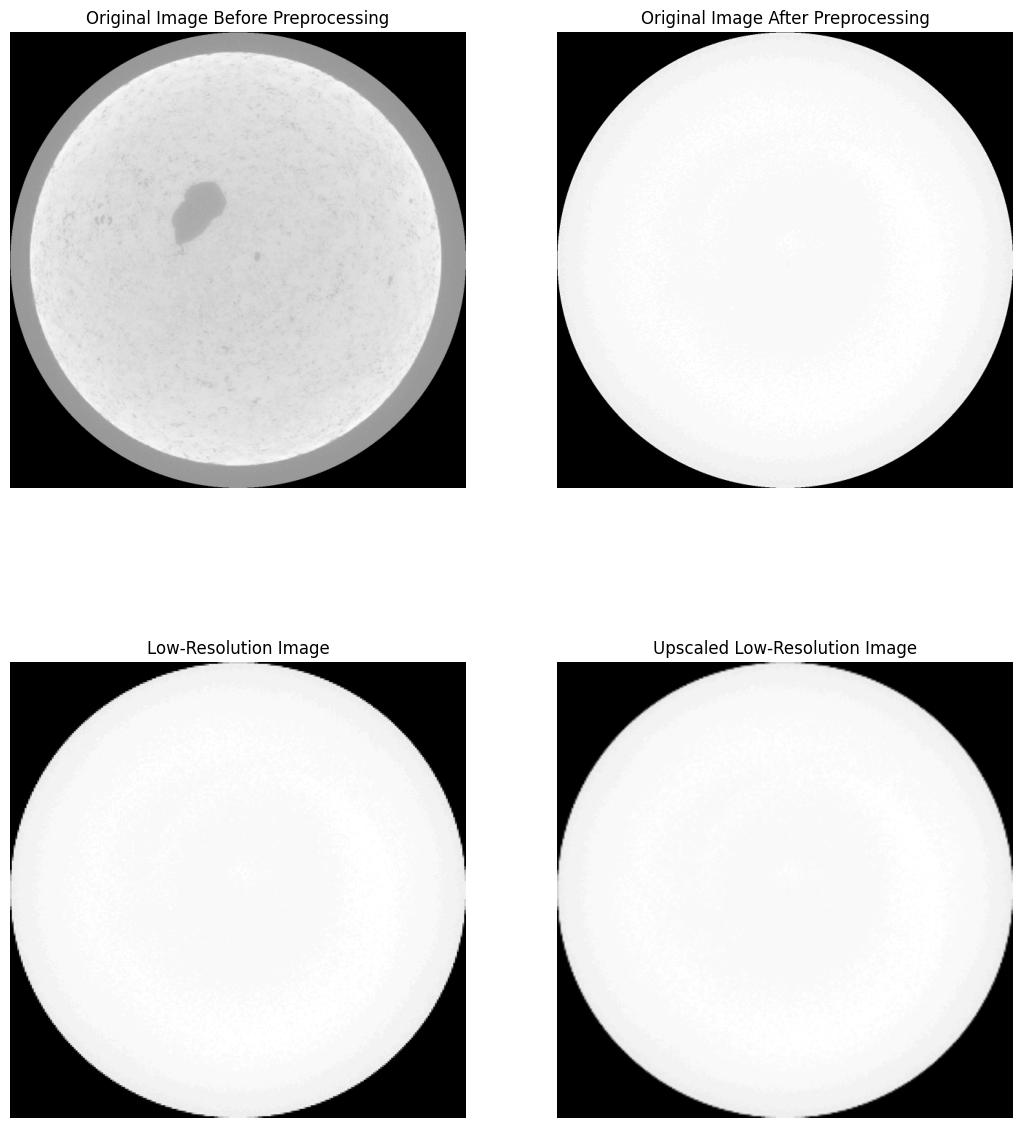

In [3]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Function to lower resolution of images
def lower_resolution(img, scale_percent):
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    low_res_img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
    return low_res_img

# Function to upscale images
def upscale(img, target_size):
    high_res_img = cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR)
    return high_res_img

# Load and preprocess images
# def load_images(img_list):
#     img_height, img_width = 626, 626
#     images = []
#     original_images = []
#     for img_path in img_list:
#         img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
#         original_images.append(cv2.resize(img, (img_height, img_width)))
#         norm_img = cv2.normalize(img, None, alpha=0, beta=65535, norm_type=cv2.NORM_MINMAX)  # Normalize the image
#         equ_img = cv2.equalizeHist(norm_img)  # Apply histogram equalization
#         img_array = np.array(equ_img) / 65535.0  # Normalize for 16-bit images
#         images.append(img_array)
#     return np.array(original_images), np.array(images)

def load_images(img_list):
    img_height, img_width = 626, 626
    images = []
    original_images = []
    for img_path in img_list:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
        original_images.append(cv2.resize(img, (img_height, img_width)))
        norm_img = img / 65535.0  # Normalize the image for 16-bit
        images.append(norm_img)
    return np.array(original_images), np.array(images)


# Get the list of uploaded image files
img_list = list(uploaded.keys())

# Load and split images into training and testing sets
original_images, images = load_images(img_list)
images = np.expand_dims(images, axis=-1)  # Expand dimensions to fit the model input shape
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

# Lower the resolution of the images and then upscale them back to the original size
scale_percent = 40
train_low_res_images = np.array([lower_resolution(img, scale_percent) for img in train_images])
test_low_res_images = np.array([lower_resolution(img, scale_percent) for img in test_images])
train_low_res_images_upscaled = np.array([upscale(img, (626, 626)) for img in train_low_res_images])
test_low_res_images_upscaled = np.array([upscale(img, (626, 626)) for img in test_low_res_images])

# Select a random image index
idx = np.random.choice(len(train_images))

# Visualize the original, low resolution and upscaled image
plt.figure(figsize=(20, 15))

# Original before preprocessing
plt.subplot(2, 3, 1)
plt.imshow(original_images[idx], cmap='gray')
plt.title('Original Image Before Preprocessing')
plt.axis('off')

# Original after preprocessing
plt.subplot(2, 3, 2)
plt.imshow(np.squeeze(train_images[idx]), cmap='gray')
plt.title('Original Image After Preprocessing')
plt.axis('off')

# Low Resolution
plt.subplot(2, 3, 4)
plt.imshow(np.squeeze(train_low_res_images[idx]), cmap='gray')
plt.title('Low-Resolution Image')
plt.axis('off')

# Upscaled
plt.subplot(2, 3, 5)
plt.imshow(np.squeeze(train_low_res_images_upscaled[idx]), cmap='gray')
plt.title('Upscaled Low-Resolution Image')
plt.axis('off')

plt.show()

In [4]:
# # Define the autoencoder model
# inputs = Input(shape=(626, 626, 1))
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# encoded = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# autoencoder = Model(inputs, decoded)
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy', learning_rate=0.001)

# # Print the model summary
# autoencoder.summary()

# Define the autoencoder model
inputs = Input(shape=(626, 626, 1))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='valid')(x)

autoencoder = Model(inputs, decoded)

# Define the optimizer and set the learning rate
optimizer = Adam(learning_rate=0.0001)

# autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')
autoencoder.compile(optimizer=optimizer, loss='mae')

# Print the model summary
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 626, 626, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 626, 626, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 313, 313, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 313, 313, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 157, 157, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 157, 157, 32)      9248  

In [5]:
# Train the model
batch_size = 16
epochs = 100
history = autoencoder.fit(train_low_res_images_upscaled, train_images,
                          batch_size=batch_size,
                          validation_data=(test_low_res_images_upscaled, test_images),
                          epochs=epochs,
                          callbacks=[EarlyStopping(monitor='val_loss', patience=10), ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)])

Epoch 1/100
17/17 [==============================] - 28s 694ms/step - loss: 0.4978 - val_loss: 0.4954 - lr: 1.0000e-04
Epoch 2/100
17/17 [==============================] - 7s 387ms/step - loss: 0.4921 - val_loss: 0.4866 - lr: 1.0000e-04
Epoch 3/100
17/17 [==============================] - 7s 386ms/step - loss: 0.4782 - val_loss: 0.4642 - lr: 1.0000e-04
Epoch 4/100
17/17 [==============================] - 7s 387ms/step - loss: 0.4426 - val_loss: 0.4074 - lr: 1.0000e-04
Epoch 5/100
17/17 [==============================] - 7s 388ms/step - loss: 0.3564 - val_loss: 0.2792 - lr: 1.0000e-04
Epoch 6/100
17/17 [==============================] - 7s 390ms/step - loss: 0.1961 - val_loss: 0.1015 - lr: 1.0000e-04
Epoch 7/100
17/17 [==============================] - 7s 388ms/step - loss: 0.0540 - val_loss: 0.0196 - lr: 1.0000e-04
Epoch 8/100
17/17 [==============================] - 7s 393ms/step - loss: 0.0110 - val_loss: 0.0053 - lr: 1.0000e-04
Epoch 9/100
17/17 [==============================] - 7s

1/1 [==============================] - 0s 18ms/step


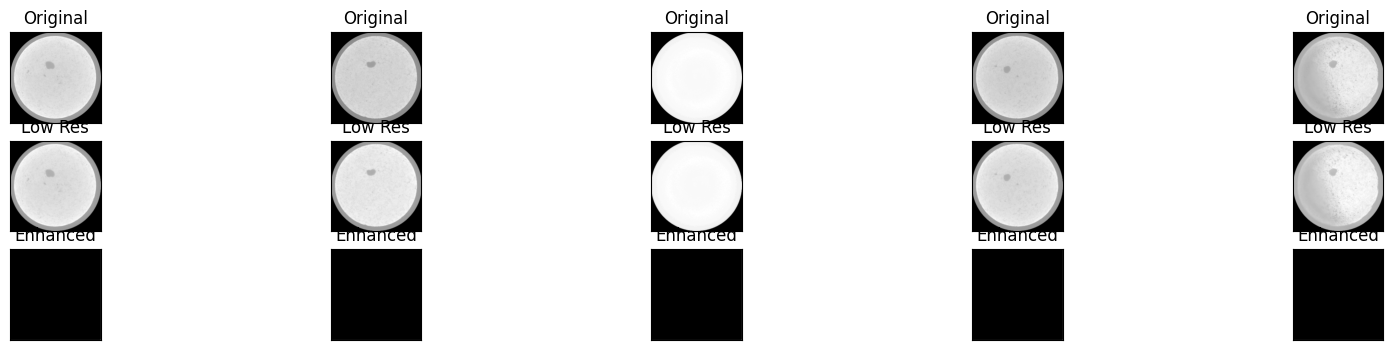

In [6]:
# Visualize the enhanced images
n = 5  # Number of images to visualize
indices = np.random.choice(len(test_images), size=n, replace=False)  # Select random indices
plt.figure(figsize=(20, 4))
for i, idx in enumerate(indices):
    # Display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(np.squeeze(test_images[idx]), cmap='gray')
    plt.title('Original')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display low resolution
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(np.squeeze(test_low_res_images_upscaled[idx]), cmap='gray')
    plt.title('Low Res')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i+1+n*2)
    reconstructed_img = autoencoder.predict(np.expand_dims(test_low_res_images_upscaled[idx], axis=0))
    plt.imshow(np.squeeze(reconstructed_img), cmap='gray')
    plt.title('Enhanced')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

1/1 [==============================] - 0s 154ms/step


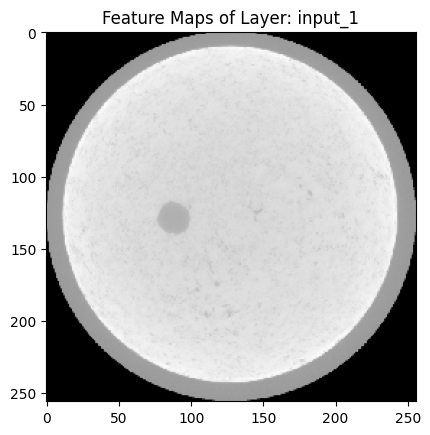

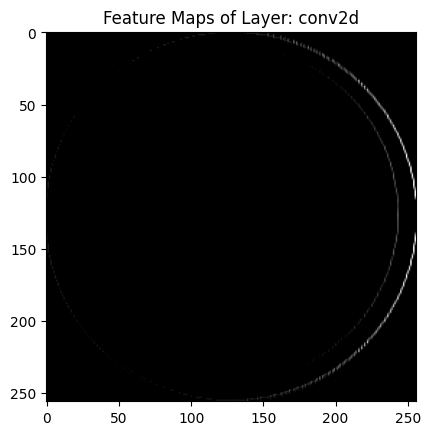

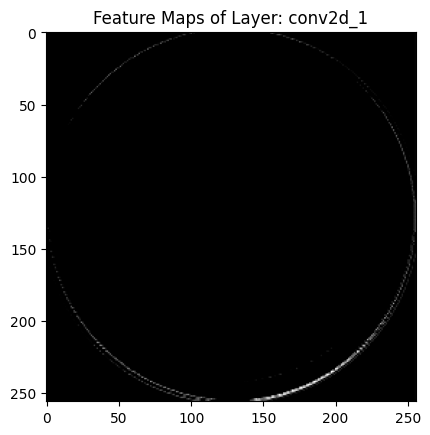

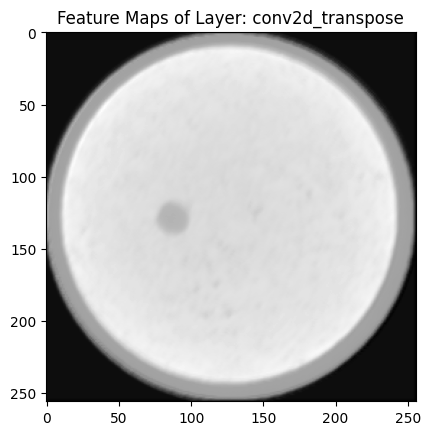

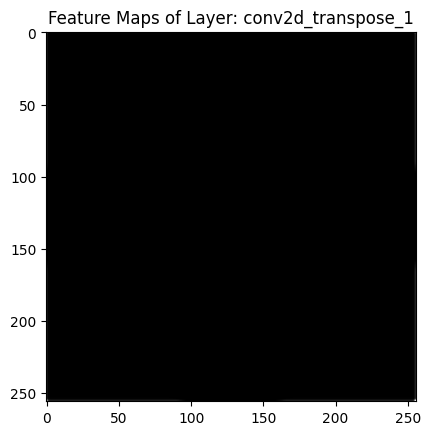

In [ ]:
# After training the model, create a new model to visualize the intermediate outputs
intermediate_model = Model(inputs=model.input, outputs=[layer.output for layer in model.layers])

# Select a random index from the test set
index = np.random.randint(test_low_res_images.shape[0])

# Predict the intermediate outputs for the selected image
intermediate_outputs = intermediate_model.predict(test_low_res_images[index:index+1])

# Display the feature maps for each layer
for layer, feature_maps in zip(model.layers, intermediate_outputs):
    # Plot the feature maps
    plt.imshow(feature_maps[0, :, :, 0], cmap='gray')
    plt.title(f"Feature Maps of Layer: {layer.name}")
    plt.show()



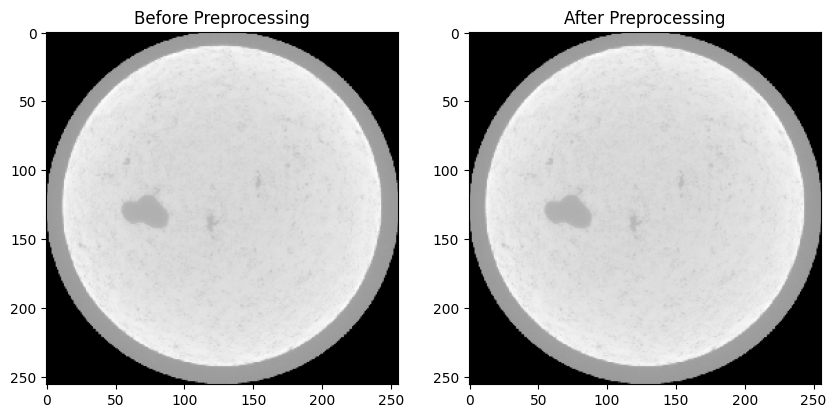

In [ ]:
# Visualize the images before and after the preprocessing step
plt.figure(figsize=(10, 5))

# Before preprocessing
plt.subplot(1, 2, 1)
plt.imshow(load_img(low_res_folder_path + low_res_filenames[0], color_mode='grayscale', target_size=(img_height, img_width)), cmap='gray')
plt.title('Before Preprocessing')

# After preprocessing
plt.subplot(1, 2, 2)
plt.imshow(load_preprocess_image(low_res_folder_path + low_res_filenames[0]), cmap='gray')
plt.title('After Preprocessing')

plt.show()